In [1]:
## Derivative of FUNCTION

from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

def position(time):
    return -4.9 * time ** 2 + 30 * time

def plot_continuous_function(t_min, t_max):
    t = np.linspace(t_min, t_max)
    x = position(t)
    plt.plot(t,x)
    plt.show()
    
def approximate_derivative(f, t):  
    delta_t = 0.0001
    vertical_change = f(t + delta_t) - f(t)
    return vertical_change / delta_t

deriv_at_3_point_45 = approximate_derivative(position, 3.45)
print("The derivative at t = 3.45 is", deriv_at_3_point_45)

The derivative at t = 3.45 is -3.810489999906963


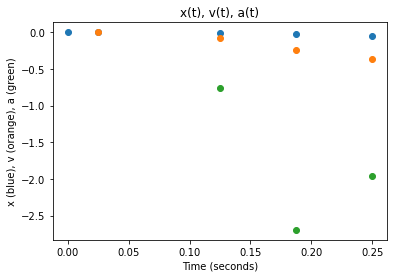

In [2]:
## Derivative of DATA

def get_derivative_from_data(position_data, time_data):

    if len(position_data) != len(time_data):
        raise(ValueError, "Data sets must have same length")
    
    speeds = []
    
    previous_position = position_data[0]
    previous_time     = time_data[0]
    
    for i in range(1, len(position_data)):
        
        position = position_data[i]
        time     = time_data[i]
        delta_x = position - previous_position
        delta_t = time - previous_time
    
        speed = delta_x / delta_t
        speeds.append(speed)
        
        previous_position = position
        previous_time     = time
    
    return speeds

ppdata = [(0.0, 0.0, 0.0, 0.0),
 (0.025, 0.0, 0.0, 1.96),
 (0.125, -0.007656250, 0.0, 1.96),
 (0.1875, -0.022968750, -0.0, 1.96),
 (0.25, -0.04593750, -0.0, 1.96)]

timestamps =[row[0] for row in ppdata]
displacements =[row[1] for row in ppdata]

speeds = get_derivative_from_data(displacements, timestamps)
accelerations = get_derivative_from_data(speeds, timestamps[1:])

plt.title("x(t), v(t), a(t)")
plt.xlabel("Time (seconds)")
plt.ylabel("x (blue), v (orange), a (green)")
plt.scatter(timestamps, displacements)
plt.scatter(timestamps[1:], speeds)
plt.scatter(timestamps[2:], accelerations)
plt.show()

In [3]:
## Integral of FUNCTION

from math import sqrt, pi

def integral(f, t1, t2, dt=0.1):
    area = 0.0
    t = t1
    
    while t < t2:
        dA = f(t) * dt
        area += dA
        t += dt
    return area


def f3(t):
    num = np.exp(-(t-5)**2/(2.0*0.2))                 
    den = sqrt(2 * pi * 0.2)
    return num/den
                 
integral(f3,3,7, 0.001)

0.9999922557157405

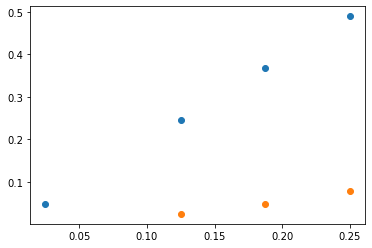

In [6]:
## Integral of DATA

def get_integral_from_data(acceleration_data, times):

    accumulated_speed = 0.0
    
    last_time = times[0]
    speeds = []
    
    for i in range(1, len(times)):
        
        acceleration = acceleration_data[i]
        time = times[i]
        
        delta_t = time - last_time
        delta_v = acceleration * delta_t

        accumulated_speed += delta_v
        speeds.append(accumulated_speed)
        
        last_time = time
    return speeds

ppdata = [(0.0, 0.0, 0.0, 0.0),
 (0.025, 0.0, 0.0, 1.96),
 (0.125, -0.007656250, 0.0, 1.96),
 (0.1875, -0.022968750, -0.0, 1.96),
 (0.25, -0.04593750, -0.0, 1.96)]

timestamps =[row[0] for row in ppdata]
displacements =[row[1] for row in ppdata]
accelerations =[row[3] for row in ppdata]

integrated_speeds = get_integral_from_data(accelerations, timestamps)
integrated_displacements = get_integral_from_data(integrated_speeds,timestamps[1:])

plt.scatter(timestamps[1:], integrated_speeds)
plt.scatter(timestamps[2:], integrated_displacements)
plt.show()

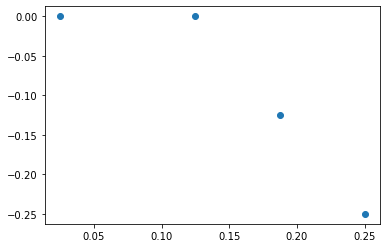

In [8]:
## integral of data(yaw rate) gives the change in heading.

def get_integral_from_data(data, times):
    
    heading = 0.0
    headings = []
    last_time = times[0]
    
    for i in range(1, len(data)):
        
        time = times[i]
        yaw = data[i]
        
        heading += yaw*(time-last_time)
        headings.append(heading)
        
        last_time = time        
    
    return headings

ppdata = [(0.0, 0.0, 0.0, 0.0),
 (0.025, 0.0, 0.0, 1.96),
 (0.125, -0.007656250, 0.0, 1.96),
 (0.1875, -0.022968750, -2.0, 1.96),
 (0.25, -0.04593750, -2.0, 1.96)]

timestamps =[row[0] for row in ppdata]
yaw_rates =[row[2] for row in ppdata]

thetas = get_integral_from_data(yaw_rates, timestamps)

plt.scatter(timestamps[1:], thetas)
plt.show()